# Strategic games between conservation NGOs
We're going to start by importing a few packages that Python uses to do the jobs we'll need. Calcuations using matrices, plotting graphs, and so on. As before, these aren't really important to understand at the moment.

Remember, to run these little blocks of code, hover your mouse over the number in the top left hand corner (e.g., [2] below), and press the "play" icon. Run each block of code you come across.

In [1]:
# This cell loads libraries that we need
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import matplotlib as mpltlb

%matplotlib inline

##Conservation fundraising as a zero sum game
In this model, we have two conservation organisations who want to do two things. First, they want to do good conservation work. However, second, they need solid conservation donations to undertake such work. Their first step is therefore to secure those funds.

Conservation donations are (in many respects) a "zero sum game". That is, every dollar that is donated to The Nature Conservancy, won't be donated to the World Wide Fund for Nature. And neither of those dollars can flow to Conservation International. Organisations are therefore in competition, and may act strategically towards each other.

Since donors are interested in different aspects of conservation, the choices made by conservation NGOs will affect the amount of funding they can raise. If they were to change their focus a bit, they might gain some new donors, but lose some old donors. 

We're going to represent an NGO's focus as a location on a one-dimensional number line between zero and one. 

$x=0$ |- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - | $x=1$

This is "conservation focus" space, or some such thing. At the left hand end, near $x = 0$, we have actors are are interested in protecting wilderness areas from deforestation. At the right hand end, near $x = 1$, we have actors are are interested in restoring degraded and cleared ecosystems. All of our actors -- donors and conservation NGOs -- exist somewhere in this space. We're going to assume that donors are stationary, and that conservation NGOs can move.

### NGO decisions

An example of a strategic landscape from the NGO perspective might be:

$x=0$ |- - $x_{N_1}$ - - - - - - - - - - - - - - - - - - - - - - - - - - - - $x_{N_2}$ - - - | $x=1$

Here, NGO 1 have located themselves at $x_{N_1}$, near to $x=0$, because they're talking a lot about protecting wilderness areas from deforestation. In Australia, this might represent The Wilderness Society.

NGO 2 have located themselves at $x_{N_2}$, near to $x=1$. They're going to be restoring heavily degraded forests. In the Australian conservation sector, that might represent Greening Australia. 

Note that these locations may reflect an actual choice about where and what they want to work on, but it could also reflect something more symbolic (e.g., how they market themselves).

In [6]:
# Let's give these two organisations their initial locations. We'll put the 
# values into the same little 2x1 vector. (Don't forget that Python calls the
# first element of the vector location "0", and then counts forward from there)
NGO_focus = np.array([0.05, 0.9]);
print("NGO 1 is working at location x =",NGO_focus[0])
print("NGO 2 is working at location x =",NGO_focus[1])

NGO 1 is working at location x = 0.05
NGO 2 is working at location x = 0.9



### Donor decisions
Donors are located in this same space. We will assume that they are evenly distributed between zero and one (i.e., a uniform distribution). Each donor will look at the different NGOs, and they will allocate all of their funds to the NGO who is most closely aligned to their values. We will estimate "alignment" as the distance between the donor and each NGO.

$𝑥=0$ |- - $x_{N_1}$ - - - - $x_d$ - - - - - - - - - - - - - - - - - - - - - - - $x_{N_2}$ - - - | $x=1$

In this diagram, the donor located at the point $x=x_d$ would allocate their funds to NGO 1, since: 

$|x_{N_1}-x_d| < |x_{N_2}-x_d|$


In [11]:
# Donors are distributed evenly in space, between 0 and 1
# A donor will fund the NGO that works closest to their interests. Thus the total funding 
# allocated to each NGO will depend on the midpoint between the two. Donors below the midpoint
# will fund the first NGO, donors above the midpoint will fund the others.

# First, calculate the midpoint
Midpoint = 0.5*(NGO_focus[0] + NGO_focus[1])
NGO1_totalbudget = Midpoint;
NGO2_totalbudget = 1-Midpoint; 

print("NGO 1 has secured a budget of ",NGO1_totalbudget)
print("NGO 2 has secured a budget of ",NGO2_totalbudget)

NGO 1 has secured a budget of  0.47500000000000003
NGO 2 has secured a budget of  0.5249999999999999


So it looks like the donors are giving a little more money to NGO 2 at the moment.

### Donor satisfaction
So a donor will give all their funding to the closest NGO, but that doesn't mean they're equally happy with all NGOs. We're going to assume that they are most happy when that NGO shares their values. The further away the NGO's focus is from their own, the less happy they become. We can therefore calculate the total happiness of all the donors $H$ by calculating the sum of all the (minimum) distances between NGOs and donors:

$H = \sum_i min_j {| x_{N_j} - x_{d_i}|}$

In [12]:
# A donor's happiness is determined by the distance between their interests, and the donor they
# choose to fund. We therefore calculate the distance to the nearest NGO, and sum it up across all
# of the donors

# Let's make 101 donors, spaced equally through the focus landscape
DonorLocation = np.linspace(0, 1, 101) 

# How far away is NGO1 and NGO2 from each of the donors?
DonorHappiness_NGO1 = 1-abs(DonorLocation-NGO_focus[0]);
DonorHappiness_NGO2 = 1-abs(DonorLocation-NGO_focus[1]);

# The donor is as happy as the closest NGO. We're going to integrate across
#  all the donors by using their average happiness.
DonorHappiness = np.mean(np.maximum(DonorHappiness_NGO1, DonorHappiness_NGO2))

print("Average donor happiness is",DonorHappiness)

Average donor happiness is 0.8142574257425743


We're being utilitarian here, and assuming that our overarching conservation goal is the greatest happiness for the greatest number. 

### Iterative strategic decision-making

Both NGOs want to maximise the funds they can raise, so that they can do as much conservation work as possible. For this reason, they're going to try new things to gain more conservation funds. In our one-dimensional space, they're going to move a little bit to the left, or a little bit to the right, to see if they get more money as a result. If their trial step gets them more funds, they're going to stick with it. If it turns out that they lose donors, they'll go back to their original location and try something new.

It's important to note that this behaviour is strategic, since the actions of one NGO will affect the achievements of the other. If NGO 1 moves towards NGO 2, they're going to take some of their donors from them (the ones that are closer to NGO 1). But this decision is not necessarily *consciously* strategic - an NGO who was making blind and random decisions could still look at their donations, and reinforce decisions that yielded higher totals. 

In the following code, each NGO will undertake this random walk process, moving left and right at random, and accepting steps that deliver higher donation totals. We're going to watch them move around strategically for a few hundred iterations, and see where they end up.

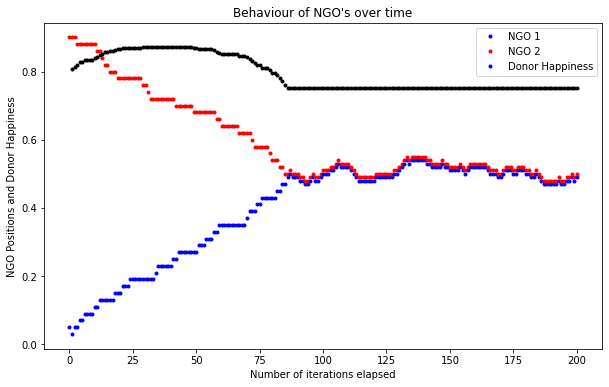

In [20]:
# Now we allow the NGOs to move randomly in space. They will accept a change if it improves their
# funding situation (which allows them to do more conservation). 

# First initialise a figure, so we can plot the location of the NGOs through time
fig, axs = plt.subplots()

# Set the size of the step they'll try out in each direction and the number of steps to take
NGO_focus = np.array([0.05, 0.9]);
littlestep = 0.02;
steps = range(1, 201)

# plot the intitial state of the system. We're going to plot the first NGO 
# as a blue circle, the second NGO as a red circle, and we're going to plot
# the average happiness of the donors as a black circle.
axs.plot(0, NGO_focus[0], 'bo', markersize = 3)
axs.plot(0, NGO_focus[1], 'ro', markersize = 3)

for s in steps:

  # Choose a random NGO to move. This involves choosing 1 or 2 at random
  MovingNGO = np.random.randint(1, 3)

  # Choose a random direction to move in. 
  dir = np.random.randint(1, 3)

  # set the potential new NGO positions
  New_NGO_focus = np.copy(NGO_focus)

  # shift the NGO location in the chosen random direction
  if MovingNGO == 1:

    # move in the specified direction if possible
    if dir == 2 and NGO_focus[0] > 0:
      New_NGO_focus[0] -= littlestep
    else:
      New_NGO_focus[0] += littlestep

  else:

    # move in the specified direction if possible
    if dir == 1 and NGO_focus[1] < 1:
      New_NGO_focus[1] += littlestep
    else:
      New_NGO_focus[1] -= littlestep

  # want to sort the NGOs so that NGO2 is always positioned above NGO1
  if New_NGO_focus[0] > New_NGO_focus[1]:
    dummyVar = New_NGO_focus[0]
    New_NGO_focus[0] = New_NGO_focus[1]
    New_NGO_focus[1] = dummyVar

  # Calculate their new budget, and compare it to the old budget *for that organisation
  New_NGO1_totalbudget = np.mean(New_NGO_focus)
  New_NGO2_totalbudget = 1 - np.mean(New_NGO_focus)

  # is the NGO that moved happier? If so it will take that step
  if MovingNGO == 1:

    if New_NGO1_totalbudget > NGO1_totalbudget:

      NGO_focus = np.copy(New_NGO_focus)
      NGO1_totalbudget = New_NGO1_totalbudget
      NGO2_totalbudget = New_NGO2_totalbudget

  else:

    if New_NGO2_totalbudget > NGO2_totalbudget:

      NGO_focus = np.copy(New_NGO_focus)
      NGO1_totalbudget = New_NGO1_totalbudget
      NGO2_totalbudget = New_NGO2_totalbudget

  # How do the donors feel about the change?
  DonorHappiness_NGO1 = 1 - abs(DonorLocation - NGO_focus[0]);
  DonorHappiness_NGO2 = 1 - abs(DonorLocation - NGO_focus[1]);
  DonorHappiness = np.mean(np.maximum(DonorHappiness_NGO1, DonorHappiness_NGO2));

  axs.plot(s, NGO_focus[0], 'bo', markersize = 3)
  axs.plot(s, NGO_focus[1], 'ro', markersize = 3)
  axs.plot(s, DonorHappiness,'ko', markersize = 3)

# add some features
axs.legend(["NGO 1", "NGO 2", "Donor Happiness"])
axs.set_xlabel("Number of iterations elapsed")
axs.set_ylabel("NGO Positions and Donor Happiness")
axs.set_title("Behaviour of NGO's over time")

# show the plot
plt.rcParams["figure.figsize"] = (10,6)
plt.show()